# Using Neural Networks to determine O/H from strong lines

Following the paper of Marino et al 2013, we will use artificial neural networks to compute a fit to the observed relation between some strong lines and the oxygen abundance.

We will define, train and use the ANN with the help of the TMNIAI (Taller Mexicano de Nebulosas Ionizadas: Mexican Group on Ionized Nenulae with Artificial Intelligence MGINAI) package. The package is freely available on the TMNI github repository.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.table import Table # To read the Marino's data from SDC

In [2]:
# Import the TMNI. If not installed, install it
try:
    import tmniai as tm
except:
    !pip install -U git+https://github.com/taller-mexicano-de-nebulosas-ionizadas/AI.git
    import tmniai as tm

/Users/christophemorisset/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
# Download Marino's data
t = Table.read('ftp://cdsarc.u-strasbg.fr/ftp/J/A+A/559/A114/table4.dat', 
               format='ascii.cds', 
               readme='ftp://cdsarc.u-strasbg.fr/ftp/J/A+A/559/A114/ReadMe')

In [4]:
# Have a look at the data
t

Ref,ID,[O3N2],[N2],Ab(O)
,,[-],[-],
int64,str17,float64,float64,float64
12,M51CCM10,-0.75734,-0.40722,8.561
12,M51CCM53,-0.34834,-0.37722,8.661
12,M51CCM54,-0.25934,-0.37022,8.53
12,M51CCM55,-0.58034,-0.38822,8.634
12,M51CCM72,-0.97234,-0.45622,8.669
12,M51CCM84A,-0.02034,-0.29822,8.528
12,NGC1232no04,1.46966,-1.11422,8.23
12,NGC1232no06,-0.04634,-0.50222,8.467


Text(0, 0.5, '12 + log O/H')

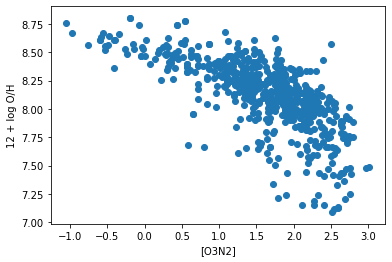

In [5]:
diag = '[O3N2]'
f, ax = plt.subplots()
ax.scatter(t[diag], t['Ab(O)'])
ax.set_xlabel(diag)
ax.set_ylabel('12 + log O/H')

In [6]:
X_test = np.linspace(np.min(t[diag]), np.max(t[diag]), 500)
RM = tm.manage_RM(RM_type='ANN', 
                  X_train=t[diag], 
                  y_train=t['Ab(O)'],
                  X_test=X_test,
                  scaling=True, 
                  verbose=True, 
                  random_seed=10)

Instantiation. V 0.15
Training set size = 624, Test set size = 500
Train data scaled.
Test data scaled.
Training set size = 624, Test set size = 500
Training set size = 624, Test set size = 500


In [7]:
RM.init_RM(hidden_layer_sizes=(100,100), 
           tol=1e-6, 
           max_iter=10000, 
           activation='logistic',
           solver='adam')

Regression Model ANN


In [8]:
RM.train_RM()

Training 1 inputs for 1 outputs with 624 data
RM trained, with 286 iterations. Score = 0.513
MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 100), learning_rate='constant',
             learning_rate_init=0.001, max_iter=10000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=10, shuffle=True, solver='adam', tol=1e-06,
             validation_fraction=0.1, verbose=False, warm_start=False)
Training time 1.4 s.


In [9]:
RM.predict(scoring=False)

Predicting from 1 inputs to 1 outputs using 500 data in 0.00 secs.


In [10]:
y = RM.pred

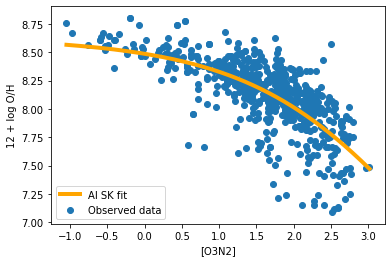

In [11]:
f, ax = plt.subplots()
ax.scatter(t[diag], t['Ab(O)'], label='Observed data')
ax.plot(X_test, y, linewidth=4, c='orange', label='AI SK fit')
ax.set_xlabel(diag)
ax.set_ylabel('12 + log O/H')
ax.legend();

In [12]:
RM1=RM

Instantiation. V 0.15
Training set size = 624, Test set size = 500
Train data scaled.
Test data scaled.
Training set size = 624, Test set size = 500
Training set size = 624, Test set size = 500
Regression Model ANN
Training 1 inputs for 1 outputs with 624 data
RM trained, with 73 iterations. Score = 0.709
MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 100), learning_rate='constant',
             learning_rate_init=0.001, max_iter=10000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=20, shuffle=True, solver='lbfgs', tol=1e-06,
             validation_fraction=0.1, verbose=False, warm_start=False)
Training time 0.2 s.
Predicting from 1 inputs to 1 outputs using 500 data in 0.00 secs.


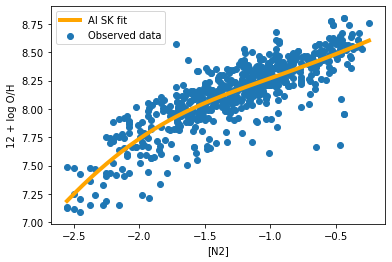

In [13]:
diag = '[N2]'
X_test = np.linspace(np.min(t[diag]), np.max(t[diag]), 500)
RM = tm.manage_RM(RM_type='ANN', 
                  X_train=t[diag], 
                  y_train=t['Ab(O)'], 
                  X_test=X_test,
                  scaling=True,
                  verbose=True, 
                  random_seed=20)
RM.init_RM(hidden_layer_sizes=(100,100), 
           tol=1e-6, 
           max_iter=10000, 
           activation='tanh',
           solver='lbfgs')
RM.train_RM()
RM.predict(scoring=False)
y = RM.pred
RM2 = RM
f, ax = plt.subplots()
ax.scatter(t[diag], t['Ab(O)'], label='Observed data')
ax.plot(X_test, y, linewidth=4, c='orange', label='AI SK fit')
ax.set_xlabel(diag)
ax.set_ylabel('12 + log O/H')
ax.legend();

Instantiation. V 0.15
Training set size = 624, Test set size = 500
Train data scaled.
Test data scaled.
Training set size = 624, Test set size = 500
Training set size = 624, Test set size = 500
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               200       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                2020      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 2,241
Trainable params: 2,241
Non-trainable params: 0
_________________________________________________________________
Regression Model Keras
Training 1 inputs for 1 outputs with 624 data
Instructions for upda

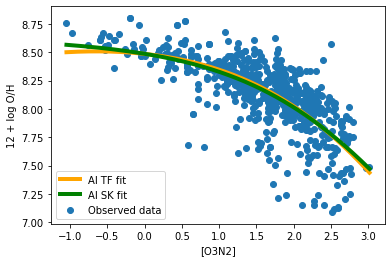

In [14]:
# Change the library. Only a few parameters needs to be updated (namely: epochs in the init method)
diag = '[O3N2]'
X_test = np.linspace(np.min(t[diag]), np.max(t[diag]), 500)
RM = tm.manage_RM(RM_type='Keras',
                  X_train=t[diag], 
                  y_train=t['Ab(O)'], 
                  X_test=X_test,
                  scaling=True, 
                  verbose=True, 
                  random_seed=20)
RM.init_RM(hidden_layer_sizes=(100,20), 
           activation='tanh',
           solver='adam', 
           epochs=100)
RM.train_RM()
RM.predict(scoring=False)
y = RM.pred
f, ax = plt.subplots()
ax.scatter(t[diag], t['Ab(O)'], label='Observed data')
ax.plot(X_test, y, linewidth=4, c='orange', label='AI TF fit')
ax.plot(X_test, RM1.pred, linewidth=4, c='green', label='AI SK fit')
ax.set_xlabel(diag)
ax.set_ylabel('12 + log O/H')
ax.legend();

Instantiation. V 0.15
Training set size = 624, Test set size = 500
Train data scaled.
Test data scaled.
Training set size = 624, Test set size = 500
Training set size = 624, Test set size = 500
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               200       
_________________________________________________________________
dense_4 (Dense)              (None, 30)                3030      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 3,261
Trainable params: 3,261
Non-trainable params: 0
_________________________________________________________________
Regression Model Keras
Training 1 inputs for 1 outputs with 624 data
RM trained. Score = nan
Training time 6.3 s.
Predicting from 1 inputs to 1 outputs using 500 data in 0.12 secs.


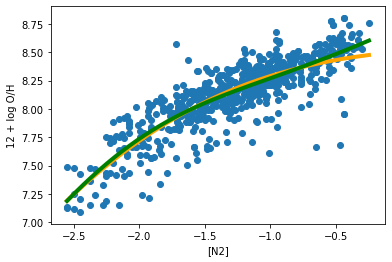

In [15]:
diag = '[N2]'
X_test = np.linspace(np.min(t[diag]), np.max(t[diag]), 500)
RM = tm.manage_RM(RM_type='Keras',
                  X_train=t[diag], 
                  y_train=t['Ab(O)'], 
                  X_test=X_test,
                  scaling=True, 
                  verbose=True, 
                  random_seed=20)
RM.init_RM(hidden_layer_sizes=(100,30), 
           activation='tanh',
           solver='adam', 
           epochs=100)
RM.train_RM()
RM.predict(scoring=False)
y = RM.pred
f, ax = plt.subplots()
ax.scatter(t[diag], t['Ab(O)'], label='Observed data')
ax.plot(X_test, y, linewidth=4, c='orange', label='AI TF fit')
ax.plot(X_test, RM2.pred, linewidth=4, c='green', label='AI SK fit')
ax.set_xlabel(diag)
ax.set_ylabel('12 + log O/H');